# TELECOM X CHALLENGE

## Introducción

La empresa Telecom X quiere evaluar la evasión de clientes que ha venido presentando y para ello nos ha solicitado un informe que les permita visualizar de manera clara esta problemática y les permita tomar decisiones para disminuir esta evasión.

## Limpieza y tratamiento de datos

### Diccionario de datos

A continuación se presenta el diccionario de cada una de las columnas del archivo evaluado:

- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

### Extracción de datos

A continuación se realizan las siguientes acciones:

- Cargar datos desde el archivo json utilizando Python
- Convertir los datos a un Dataframe de pandas para facilitar su manipulación

In [1]:
#pip install pandas

In [2]:
#pip install numpy

In [3]:
import pandas as pd
import numpy as np

Creación de dataset:

In [4]:
datos_telecom = pd.read_json('TelecomX_Data.json')

In [5]:
datos_telecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [6]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Normalizació de las columnas 'customer', 'phone', 'internet', 'account'.

In [7]:
columnas_telecom = ['customer', 'phone', 'internet', 'account']

dfs = []

for col in columnas_telecom:
    temp = pd.json_normalize(datos_telecom[col])
    temp.columns = [f'{col}_{c}' for c in temp.columns]
    dfs.append(temp)

Telecom_x = pd.concat([datos_telecom.drop(columns=columnas_telecom)] + dfs, axis=1)


In [8]:
Telecom_x


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### Transformación de datos

#### Comprobación de incoherencias en los datos

A continuación revisamos la incoherencias que pueda contener el dataset.

In [9]:
#Columnas del dataframe
Telecom_x.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')

In [10]:
Telecom_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

Verificando cantidad de elementos únicos en la columna CustumerID para evitar duplicados

In [11]:
Telecom_x['customerID'].nunique()

7267

In [12]:
columnas = ['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod']

Creando un dataframe visualizando los elementos únicos en las columnas

In [13]:
df_unicos = pd.DataFrame({
    col: pd.Series(pd.unique(Telecom_x[col]))
    for col in columnas
})

df_unicos

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod
0,No,Female,0.0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check
1,Yes,Male,1.0,No,No,No,Yes,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,No,Electronic check
2,,NaN,NaN,NaN,NaN,NaN,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,NaN,Credit card (automatic)
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bank transfer (automatic)


La columna 'Churn' presenta registros en blanco

In [14]:
Telecom_x['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

Visualizando los registros 'Churn' vacíos

In [15]:
Telecom_x.query('Churn == ""')

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [16]:
Telecom_x['Churn'].value_counts(dropna=False)

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Teniendo en cuenta que no se presenta otra información para determinar si el cliente dejó o no la empresa, se eliminarán estos registros 'Churn' vacíos del dataframe.

In [17]:
Telecom_x = Telecom_x[Telecom_x['Churn'].str.strip() != '']

Verificando eliminación

In [18]:
Telecom_x['Churn'].value_counts(dropna=False)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Nueva cantidad de filas del dataset: 7043

In [19]:
Telecom_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

Explorando la columna customer_tenure

In [20]:
pd.unique(Telecom_x['customer_tenure'])

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42,  0])

In [21]:
pd.set_option('display.max_rows', None)

In [22]:
Telecom_x['customer_tenure'].value_counts()

customer_tenure
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
70    119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
52     80
64     80
56     80
16     80
25     79
26     79
61     76
60     76
65     76
14     76
46     74
19     73
30     72
63     72
27     72
29     72
20     71
41     70
62     70
53     70
32     69
54     68
51     68
50     68
47     68
58     67
49     66
34     65
37     65
43     65
42     65
31     65
57     65
33     64
55     64
48     64
40     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: count, dtype: int64

In [23]:
pd.reset_option('display.max_rows')

Ajustando columna senior citizen para manejar el mismo formato de Yes/No del resto de las columnas.

In [24]:
Telecom_x.loc[:, 'customer_SeniorCitizen'] = Telecom_x['customer_SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

C:\Users\Silvia\AppData\Local\Temp\ipykernel_7208\3248597452.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['No' 'No' 'No' ... 'No' 'No' 'No']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Telecom_x.loc[:, 'customer_SeniorCitizen'] = Telecom_x['customer_SeniorCitizen'].replace({0: 'No', 1: 'Yes'})


Verificando cambios

In [25]:
Telecom_x['customer_SeniorCitizen'].value_counts()

customer_SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

In [26]:
Telecom_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   object 
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

La columna account_Charges.Total está almacenada como texto, por lo que es necesario convertirla a numérica.

In [27]:
#Revisando caracteres diferentes a los númericos y punto
Telecom_x = Telecom_x.copy()
Telecom_x['account_Charges.Total'] = Telecom_x['account_Charges.Total'].str.strip().replace('',np.nan).str.replace(r'[^0-9.]','',regex=True).pipe(pd.to_numeric,errors='coerce')

In [28]:
Telecom_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   object 
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

Algunos elementos de account_Charges.Total están vacíos pero esto se debe a que Tenure = 0 por lo que se deben reemplazar estos valores por ceros

In [29]:
Telecom_x[Telecom_x['account_Charges.Total'].isna()]

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
975,1371-DWPAZ,No,Female,No,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,No,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,No,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,No,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,No,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,No,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [30]:
Telecom_x.loc[:, 'account_Charges.Total'] = Telecom_x['account_Charges.Total'].fillna(0)

In [31]:
Telecom_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   object 
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

#### Cuentas Diarias

Creación de columna Cuentas_Diarias que representa la facturación mensual para calcular el valor diario.

In [32]:
Telecom_x['Cuentas_Diarias'] = Telecom_x['account_Charges.Monthly'] / 30

In [33]:
Telecom_x.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [34]:
Telecom_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   object 
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

### Estandarización y transformación de datos

Se cambiarán los yes por 1 y los no por 0 y se renombrarán las columnas.

In [35]:
df_unicos

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod
0,No,Female,0.0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check
1,Yes,Male,1.0,No,No,No,Yes,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,No,Electronic check
2,,NaN,NaN,NaN,NaN,NaN,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,NaN,Credit card (automatic)
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bank transfer (automatic)


In [36]:
columnas_yes_no = ['Churn','customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_OnlineSecurity',\
                    'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling']

In [37]:
for i in columnas_yes_no:
    Telecom_x[i] = Telecom_x[i].apply(lambda x: 1 if x == 'Yes' else 0)

Telecom_x


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [38]:
df_unicos = pd.DataFrame({
    col: pd.Series(pd.unique(Telecom_x[col]))
    for col in columnas
})

df_unicos

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod
0,0.0,Female,0.0,1.0,1.0,1.0,0.0,DSL,0.0,1.0,0.0,1.0,1.0,0.0,One year,1.0,Mailed check
1,1.0,Male,1.0,0.0,0.0,0.0,1.0,Fiber optic,1.0,0.0,1.0,0.0,0.0,1.0,Month-to-month,0.0,Electronic check
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,Two year,NaN,Credit card (automatic)
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bank transfer (automatic)


In [39]:
Telecom_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   int64  
 5   customer_Dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   int64  
 8   phone_MultipleLines        7043 non-null   int64  
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   int64  
 11  internet_OnlineBackup      7043 non-null   int64  
 12  internet_DeviceProtection  7043 non-null   int64  
 13  internet_TechSupport       7043 non-null   int64  
 1

In [40]:
Telecom_x = Telecom_x.rename(columns=lambda col: col.split('_', 1)[1] if '_' in col else col)

Telecom_x.columns.tolist()

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'Diarias']

In [41]:
Telecom_x = Telecom_x.rename(columns={'Diarias': 'Charges.Daily'})

In [42]:

Telecom_x.columns.tolist()

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'Charges.Daily']

## Análisis exploratorio de datos

### Análisis descriptivo

A continuación vemos un resumen estadístico de las variables numéricas del dataset Telecom_x:

In [43]:
Telecom_x.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Charges.Daily
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


### Distribución de evasión

In [44]:
#pip install matplotlib seaborn

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

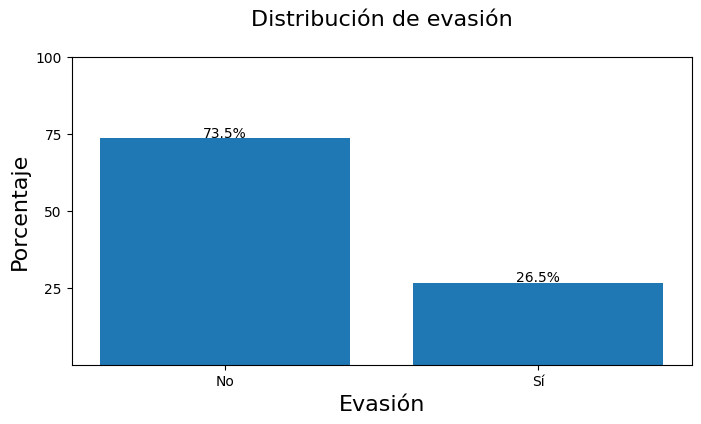

In [46]:
fig, ax = plt.subplots(figsize=(8,4))
porcentaje = (Telecom_x['Churn'].value_counts(normalize=True).sort_index()*100)
ax.bar(porcentaje.index, porcentaje.values)
ax.set_title('Distribución de evasión\n', fontsize=16)
ax.set_xlabel('Evasión', fontsize=16)
ax.set_ylabel('Porcentaje', fontsize=16)
labels = ['No', 'Sí']
ax.set_xticks([0,1])
ax.set_xticklabels(labels)
ax.set_ylim(0,100)
ax.set_yticks([25,50,75,100])
for i, v in enumerate(porcentaje.values):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center')
plt.show()

De la gráfica anterior vemos la distribución porcentual de evasión de clientes.

### Recuento de evasión por variables categóricas

In [47]:
Telecom_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 
 17  

In [48]:
tabla_gender = pd.crosstab(Telecom_x['gender'],Telecom_x['Churn'],normalize='index')
tabla_gender

Churn,0,1
gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603


In [49]:
Telecom_x = Telecom_x.rename(columns={'gender': 'Género','InternetService':'Servicio de Internet','Contract':'Tipo de Contrato','PaymentMethod':'Método de Pago'})

In [50]:
categoricas = ['Género','Servicio de Internet','Tipo de Contrato','Método de Pago']

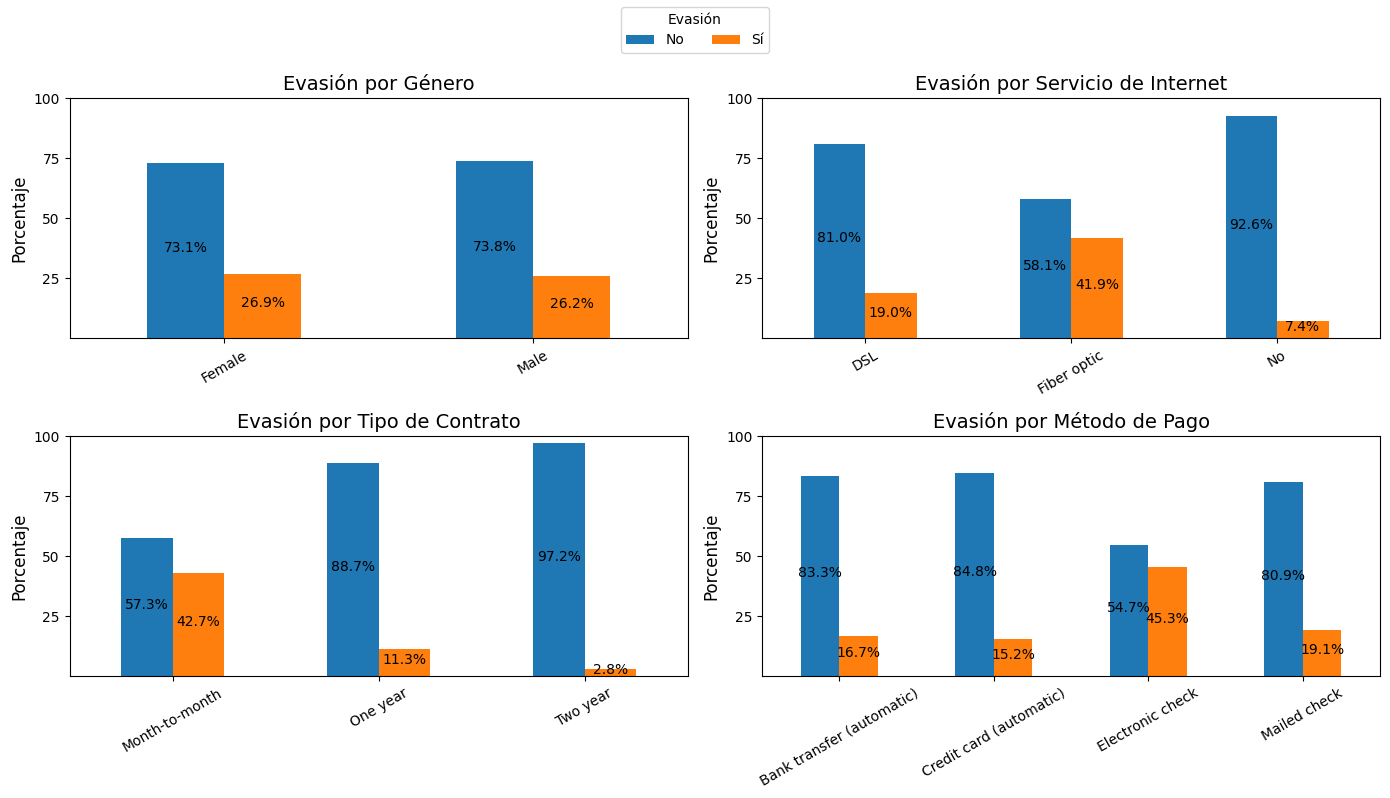

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for ax, col in zip(axes, categoricas):
    
    tabla = (
        pd.crosstab(
            Telecom_x[col],
            Telecom_x['Churn'],
            normalize='index'
        ) * 100
    )
    
    tabla = tabla.sort_index()
    
    tabla.plot(
        kind='bar',
        stacked=False,
        ax=ax,
        legend=False
    )
    
    ax.set_title(f'Evasión por {col}', fontsize=14)
    ax.set_xlabel(None)
    ax.set_ylabel('Porcentaje', fontsize=12)
    
    ax.set_ylim(0, 100)
    ax.set_yticks([25, 50, 75, 100])
    
    ax.tick_params(axis='x', rotation=30)
    for container in ax.containers:
        ax.bar_label(
            container,
            fmt='%.1f%%',
            label_type='center',
            padding=2
        )


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['No', 'Sí'], title='Evasión', loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

En la gráfica anterior vemos la distribución porcentual de evasión de clientes por género, servicio de internet tipo de contratación y método de pago.

### Conteo de evasión por variables numéricas

In [52]:
Telecom_x = Telecom_x.rename(columns={'Charges.Monthly': 'Costo mensual','Charges.Total':'Gasto total'})

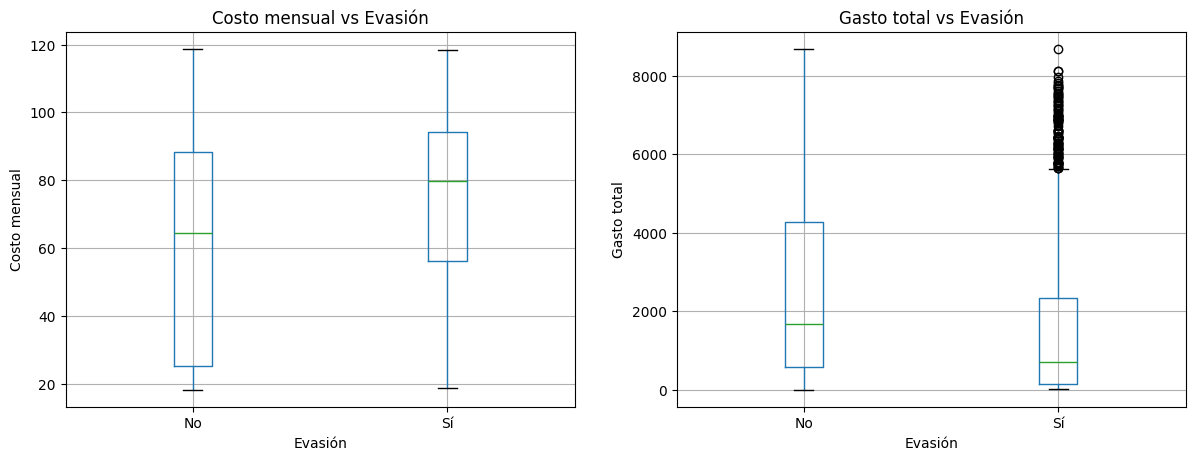

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

Telecom_x.boxplot(
    column='Costo mensual',
    by='Churn',
    ax=ax[0]
)
labels = ['No', 'Sí']

ax[0].set_xticks([1,2])
ax[0].set_xticklabels(labels)

ax[0].set_title('Costo mensual vs Evasión')
ax[0].set_xlabel('Evasión')
ax[0].set_ylabel('Costo mensual')

Telecom_x.boxplot(
    column='Gasto total',
    by='Churn',
    ax=ax[1]
)


ax[1].set_xticks([1,2])
ax[1].set_xticklabels(labels)

ax[1].set_title('Gasto total vs Evasión')
ax[1].set_xlabel('Evasión')
ax[1].set_ylabel('Gasto total')


plt.suptitle('')
plt.show()

En la gráfica anterior se evidencia que a mayor promedio de gasto mensual la evasión es mayor.

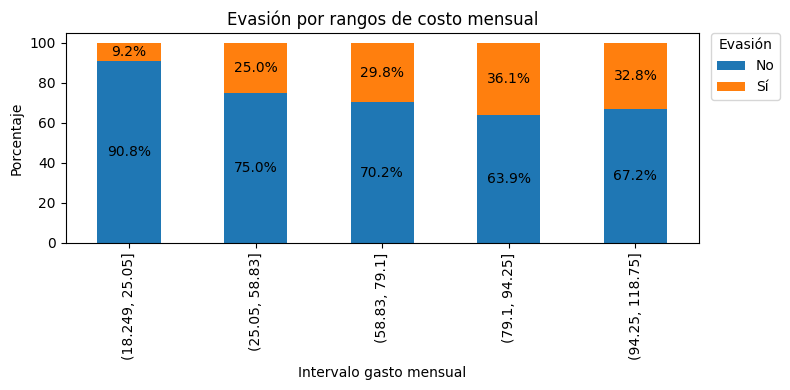

In [54]:
Telecom_x['Intervalo gasto mensual'] = pd.qcut(
    Telecom_x['Costo mensual'],
    q=5
)

tabla = (
    pd.crosstab(
        Telecom_x['Intervalo gasto mensual'],
        Telecom_x['Churn'],
        normalize='index'
    ) * 100
)

fig, ax = plt.subplots(figsize=(8, 4))

tabla.plot(
    kind='bar',
    stacked=True,
    ax=ax
)

ax.set_ylabel('Porcentaje')
ax.set_title('Evasión por rangos de costo mensual')

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.1f%%',
        label_type='center'
    )

ax.legend(
    ['No', 'Sí'],
    title='Evasión',
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)

plt.tight_layout()
plt.show()

En la gráfica anterior se puede evidenciar rango de precios mensuales para los cuales va aumentando la evasión.

## Conclusiones e Insights

Tomamos como referencia la siguiente tabla para evaluar la evasión de clientes:

| Nivel     | Evasión anual   | Interpretación                     |
| --------- | ------------- | ---------------------------------- |
| Excelente | **< 10%**     | Clientes leales, alta satisfacción |
| Bueno     | **10% – 15%** | Competitivo y sostenible           |
| Aceptable | **15% – 20%** | Requiere monitoreo                 |
| Alto      | **20% – 25%** | Riesgo comercial                   |
| Crítico   | **> 25%**     | Problema estructural               |


- Se tiene una evasión total de 26.5% por lo que se puede decir que representa un riesgo comercial.
- Donde mayor porcetaje de evasión se encuentra es en los clientes con un contrato mes a mes con un 42.7%.
- El promedio de costo mensual de los clientes que se han evadido es de $80 vs $60 de los que no se han evadido.
- En promedio el gasto total de los clientes que se han evadido es de $1000 vs $2000 de los que no se han evadido.
- El porcentaje de evasión es mayor al 25% en clientes que tienen un gasto mensual mayor a $58.83.

## Recomendaciones

- Teniendo en cuenta que los tipos de contratos que más generan evasión son los mes a mes, debería haber una fuerte campaña para promover los contratos mayores a un año.
- Promover planes que en total tengan un costo mensual promedio cercano a los $60 genera menor evasión por parte de los clientes.
- Promover campañas que incluyan en su forma de pago el débito automático podría generar menor evasión por parte de los clientes.